<a href="https://colab.research.google.com/github/burakerdgn/GoogleColab/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Inputs

from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.vgg16 import  VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import  Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2021-04-28 06:28:45--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  24.4MB/s    in 22s     

2021-04-28 06:29:08 (19.1 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [ ]:
!unzip -qq -o Food-5K.zip

In [ ]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [ ]:
!ls Food-5K/training

In [ ]:
!mv Food-5K/* .

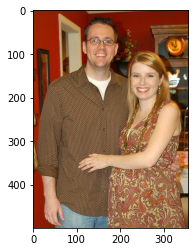

In [ ]:
plt.imshow(image.load_img('training/0_828.jpg'))
plt.show()

In [ ]:
!mkdir data

In [ ]:
#Make directories to store the data Keras-style
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food


In [ ]:
#Move the images
#Note: we will consider 'training' to be the train set
#       'validation' folder will be the test set
#       ignore the 'evaluation' set
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food


In [ ]:
train_path = 'data/train'
valid_path = 'data/test'

In [ ]:
IMAGE_SIZE = [200, 200]

In [ ]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [ ]:
# useful for getting number of classes
folders = glob(train_path + '/*')
folders

['data/train/nonfood', 'data/train/food']

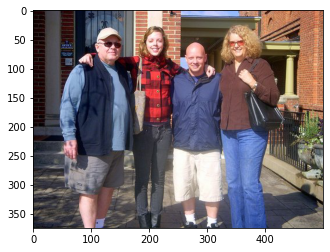

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
ptm.trainable = False

In [ ]:
# map the data into feature vectors

# Keras image data generator returns classes one-hot encoded

K = len(folders) # number of classes
x = Flatten()(ptm.output)
x = Dense(K,activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=ptm.input, outputs=x)

In [ ]:
model.summary()

In [ ]:
# create an instance of ImageDataGenerator

gen_train = ImageDataGenerator(rotation_range=20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range=0.1,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               preprocessing_function=preprocess_input)

gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
batch_size = 128

#create generators
train_generator = gen_train.flow_from_directory(train_path,
                                                shuffle=True,
                                                target_size=IMAGE_SIZE,
                                                batch_size=batch_size,)

valid_generator = gen_test.flow_from_directory(valid_path,
                                               target_size=IMAGE_SIZE, 
                                               batch_size=batch_size,)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#fit the model

r = model.fit_generator(train_generator,
                        validation_data=valid_generator,
                        epochs=10,
                        steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
                        validation_steps=int(np.ceil(len(valid_image_files)/ batch_size)),
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 3.9336 - accuracy: 0.8028 